In [1]:
# Import library
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [2]:
# Import data dan drop kolom yang tidak digunakan
data = pd.read_csv("data_UTS.csv")
data = data.drop(data.columns[0:3], axis=1)
display(data.head(5))

,Sosial_Media,freq_Penggunaan,freq_wasting,duration_of_use,productive_duration,disturbed,freq_Postpone,freq_pastDeadline,freq_disturbed,freq_allocationTime,negative_impact
0,Tiktok,5,5,1,2,Tidak,3,1,3,2,Tidak
1,Instagram,4,4,1,7,Tidak,3,1,3,3,Ya
2,Instagram,5,4,1,3,Tidak,3,2,2,3,Tidak
3,Instagram,3,3,1,8,Tidak,3,1,2,2,Tidak
4,Instagram,3,3,1,5,Tidak,4,1,2,5,Tidak


In [3]:
# Cetak jumlah missing value pada setiap kolom
data_missing = data.isnull().sum()
for kolom, jumlah_missing in data_missing.items():
    print(f"Jumlah missing_value pada kolom '{kolom}': {jumlah_missing}")

Jumlah missing_value pada kolom 'Sosial_Media': 0
Jumlah missing_value pada kolom 'freq_Penggunaan': 0
Jumlah missing_value pada kolom 'freq_wasting': 0
Jumlah missing_value pada kolom 'duration_of_use': 0
Jumlah missing_value pada kolom 'productive_duration': 0
Jumlah missing_value pada kolom 'disturbed': 0
Jumlah missing_value pada kolom 'freq_Postpone': 0
Jumlah missing_value pada kolom 'freq_pastDeadline': 0
Jumlah missing_value pada kolom 'freq_disturbed': 0
Jumlah missing_value pada kolom 'freq_allocationTime': 0
Jumlah missing_value pada kolom 'negative_impact': 0


c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


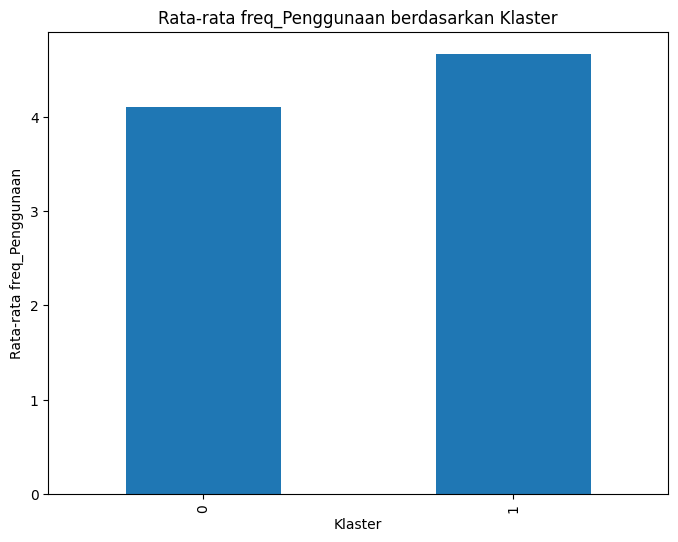

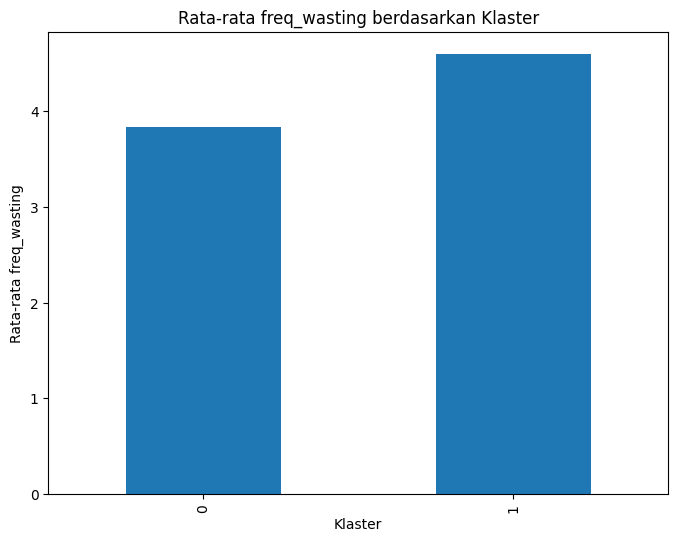

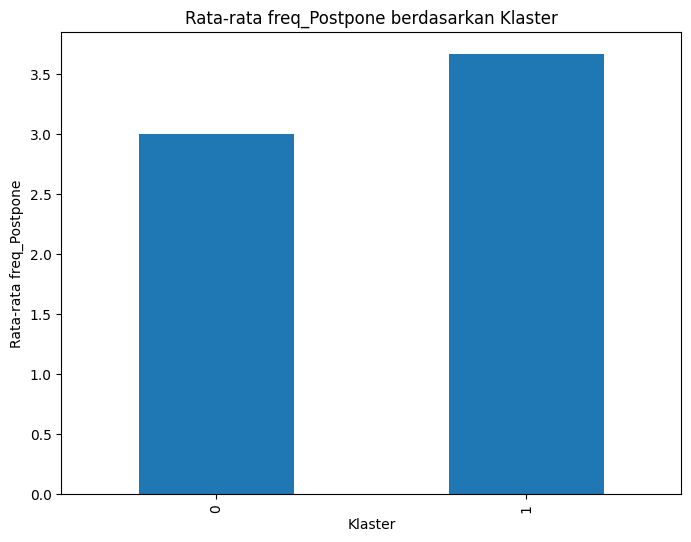

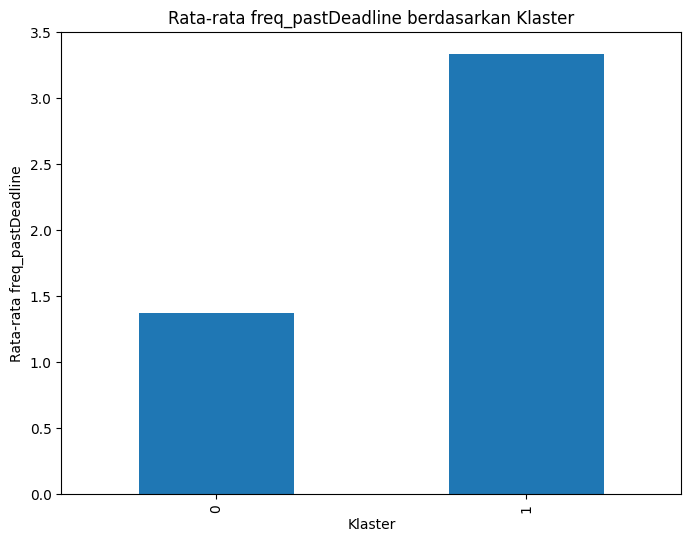

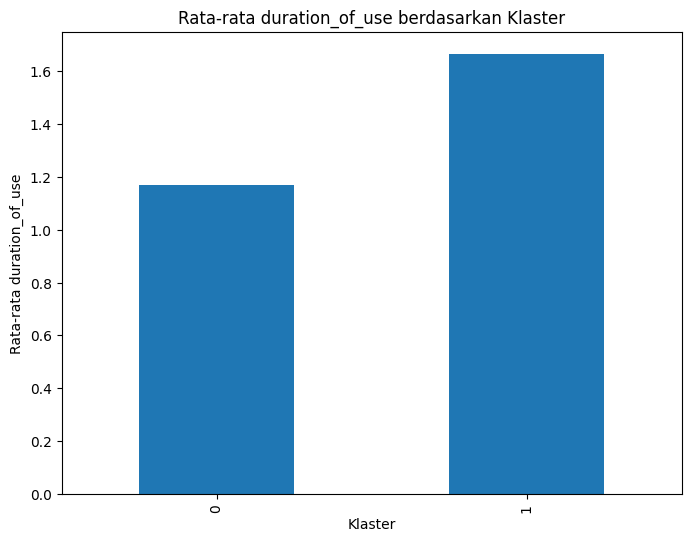

In [4]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

for column in input_columns:
    plt.figure(figsize=(8, 6))
    data.groupby(output_column)[column].mean().plot(kind='bar')
    plt.title(f'Rata-rata {column} berdasarkan Klaster')
    plt.xlabel('Klaster')
    plt.ylabel(f'Rata-rata {column}')
    plt.show()


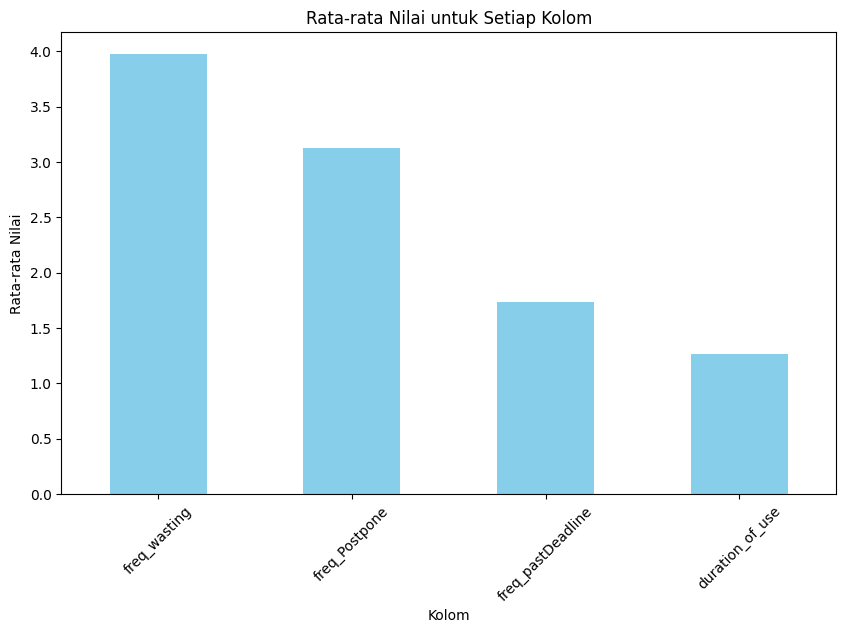

In [5]:
# Pilih kolom-kolom yang ingin Anda visualisasikan
selected_columns = ['freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']

# Hitung rata-rata nilai untuk setiap kolom
average_values = data[selected_columns].mean()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
average_values.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Nilai untuk Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=45)
plt.show()

c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


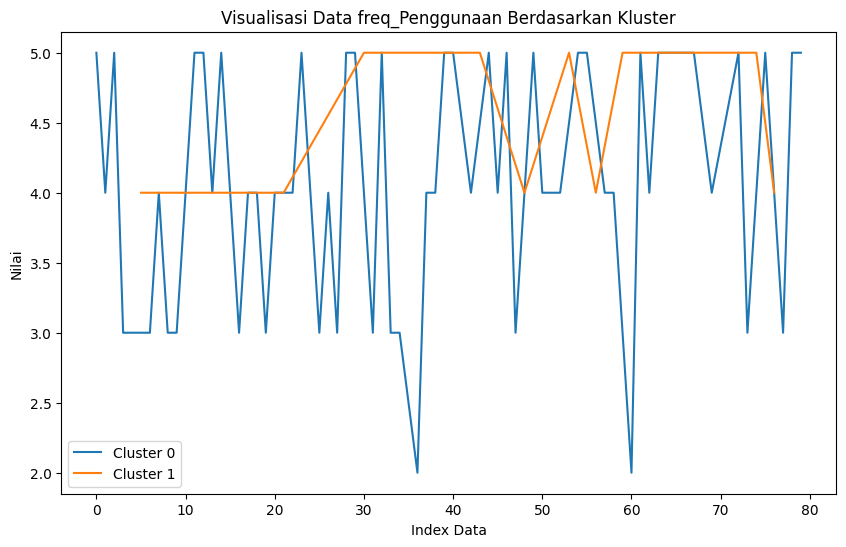

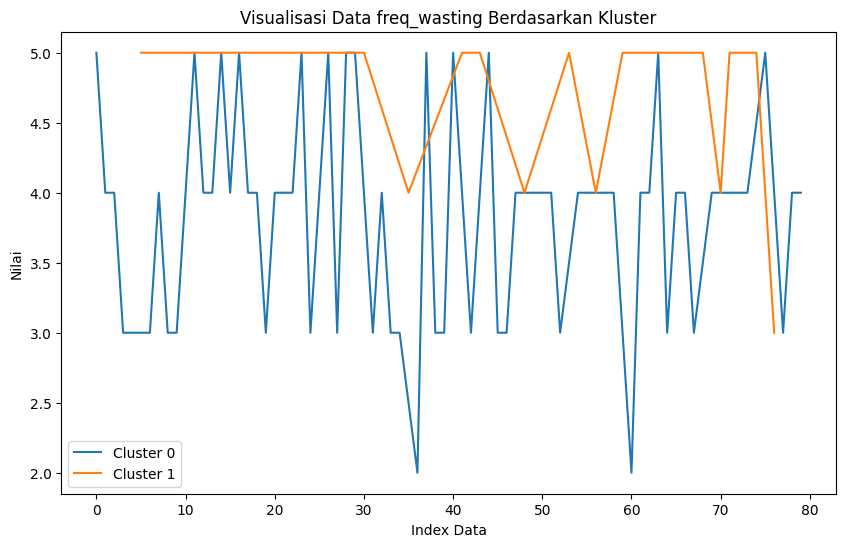

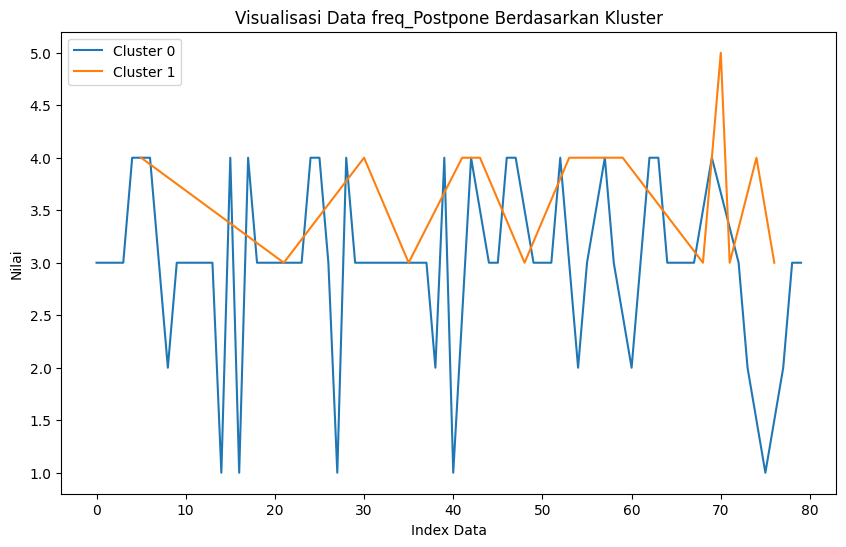

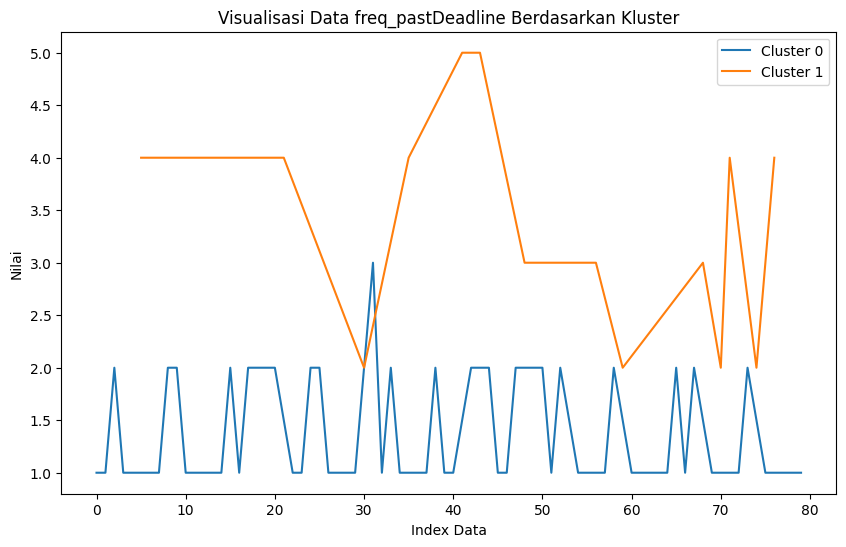

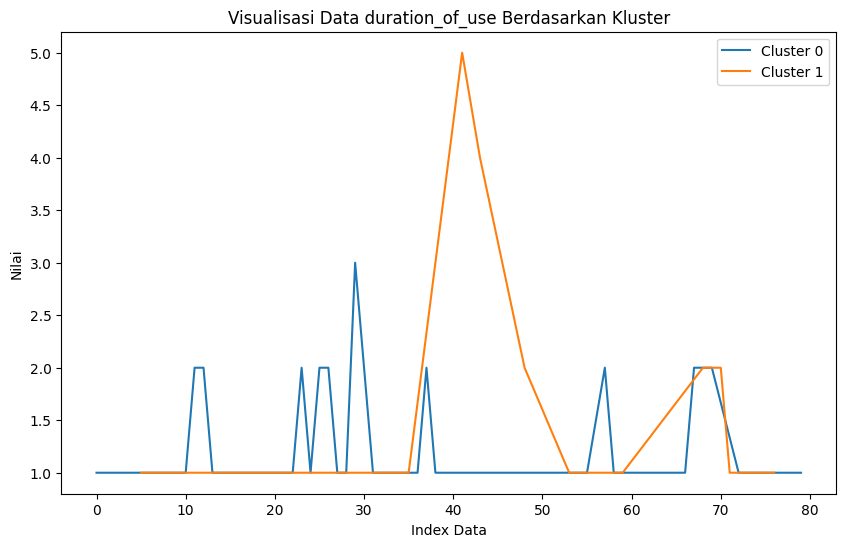

In [6]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

# Membuat plot garis untuk setiap kolom berdasarkan kluster
for column in input_columns.columns:
    plt.figure(figsize=(10, 6))
    
    for cluster_label in range(n_clusters):
        cluster_data = data[data['cluster'] == cluster_label]
        plt.plot(cluster_data.index, cluster_data[column], label=f'Cluster {cluster_label}')

    # Penyuntingan plot
    plt.title(f'Visualisasi Data {column} Berdasarkan Kluster')
    plt.xlabel('Index Data')
    plt.ylabel('Nilai')
    plt.legend()
    plt.show()


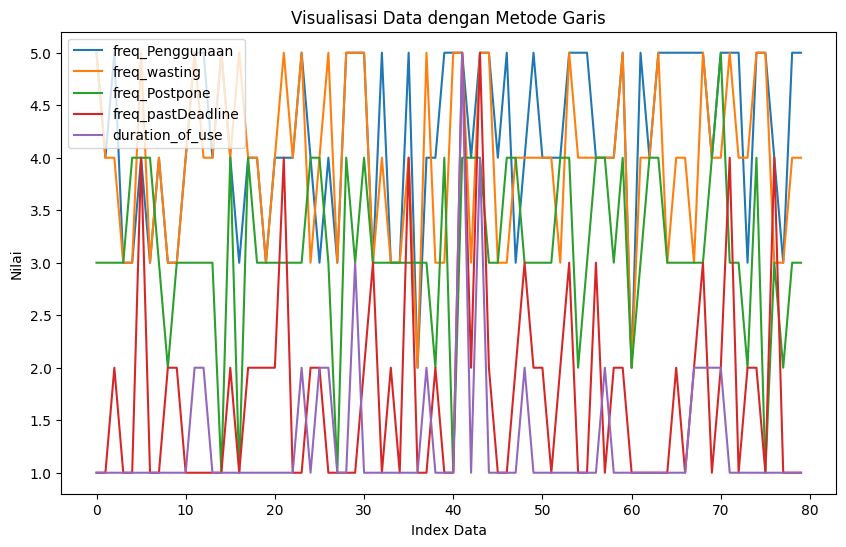

In [7]:
# Pilih kolom-kolom yang ingin Anda visualisasikan
selected_columns = ['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']

# Membuat plot garis untuk setiap kolom
plt.figure(figsize=(10, 6))
for column in selected_columns:
    plt.plot(data[column], label=column)

# Penyuntingan plot
plt.title('Visualisasi Data dengan Metode Garis')
plt.xlabel('Index Data')
plt.ylabel('Nilai')
plt.legend()
plt.show()

c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


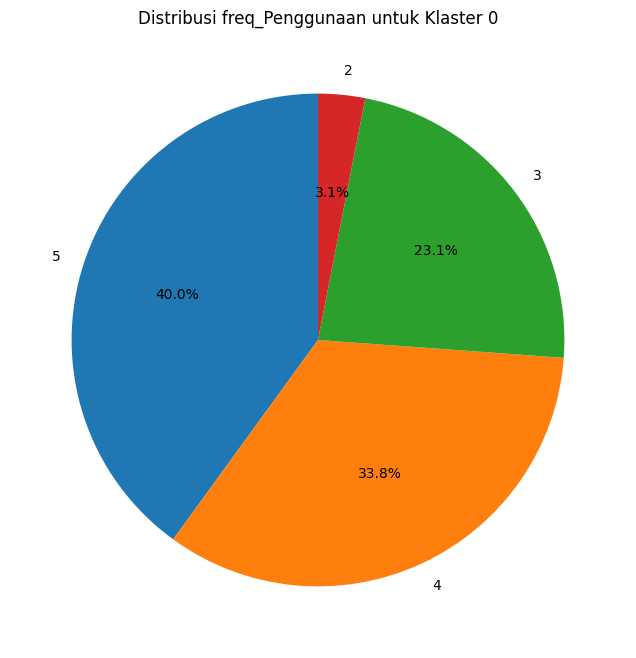

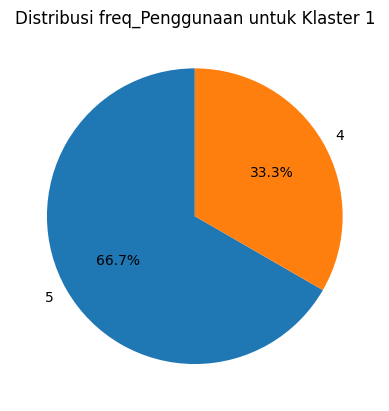

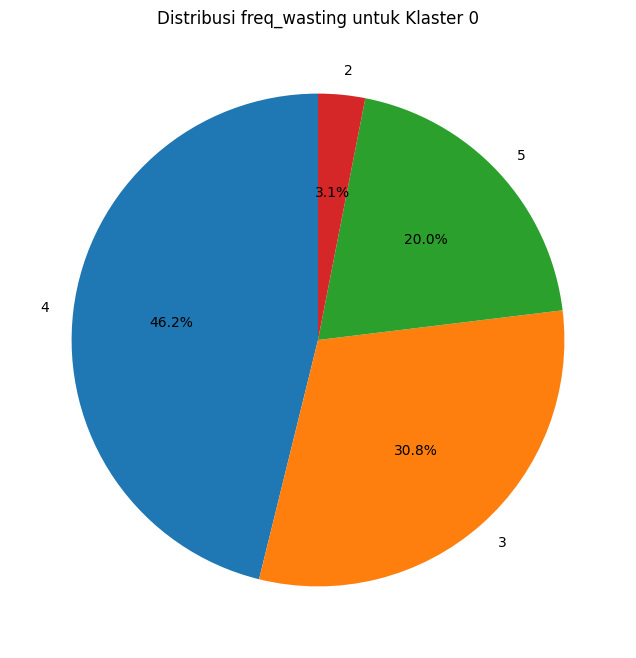

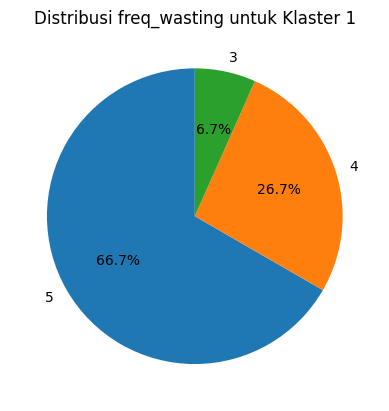

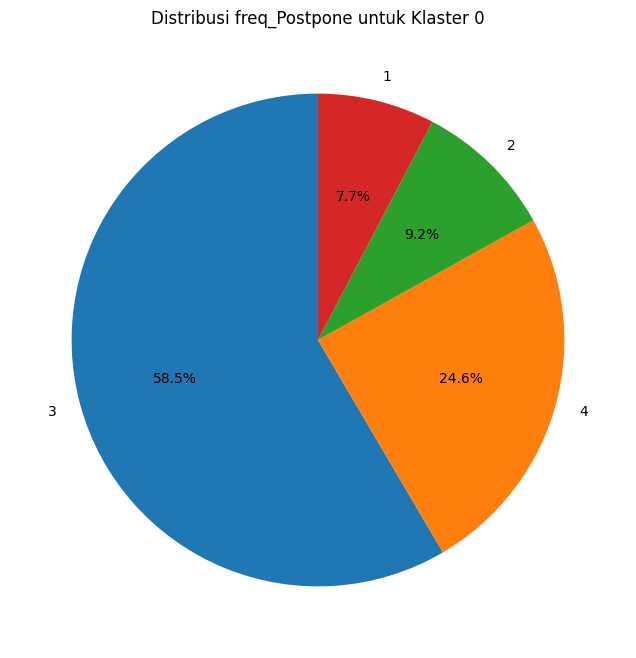

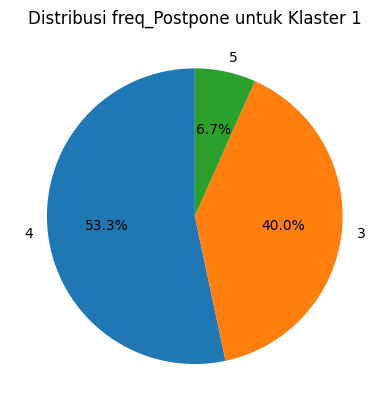

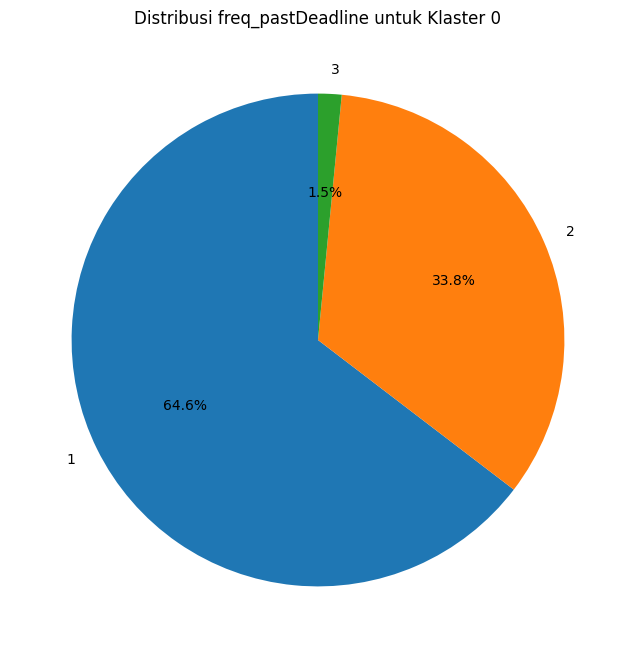

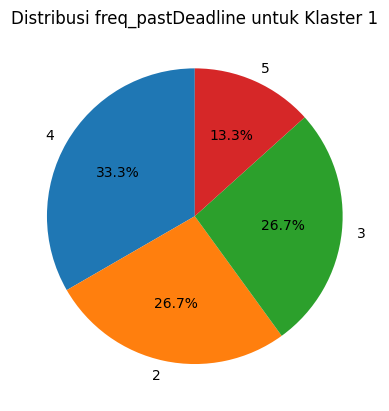

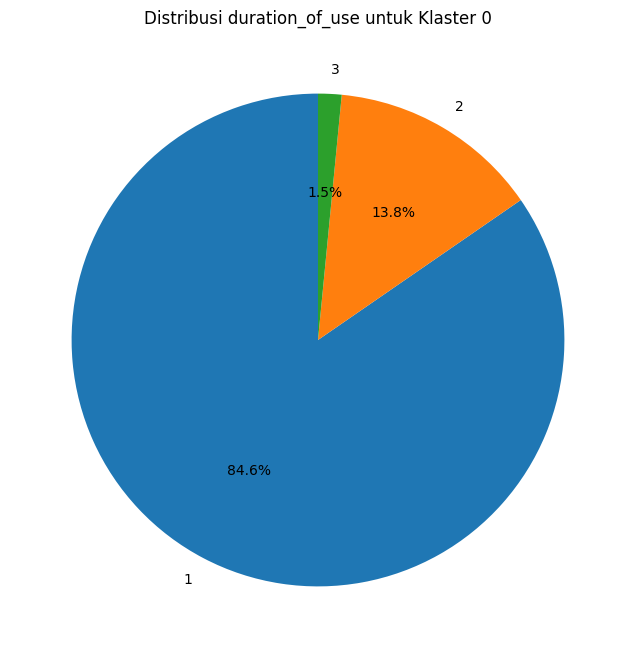

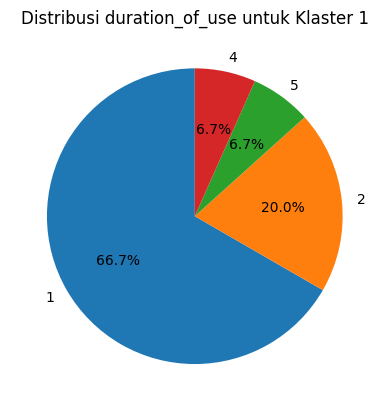

In [8]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

# Membuat plot pie untuk distribusi kluster berdasarkan masing-masing kolom
for column in input_columns.columns:
    plt.figure(figsize=(8, 8))
    
    for cluster_label in range(n_clusters):
        cluster_data = data[data['cluster'] == cluster_label]
        column_counts = cluster_data[column].value_counts()
        plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribusi {column} untuk Klaster {cluster_label}')
        plt.show()


c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


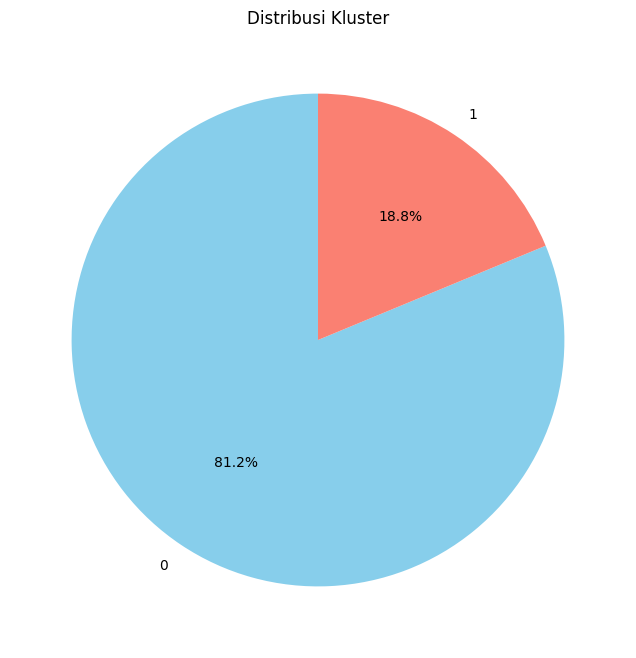

In [9]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

# Membuat plot pie untuk distribusi kluster
cluster_counts = data['cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribusi Kluster')
plt.show()


c:\Users\Johan RN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


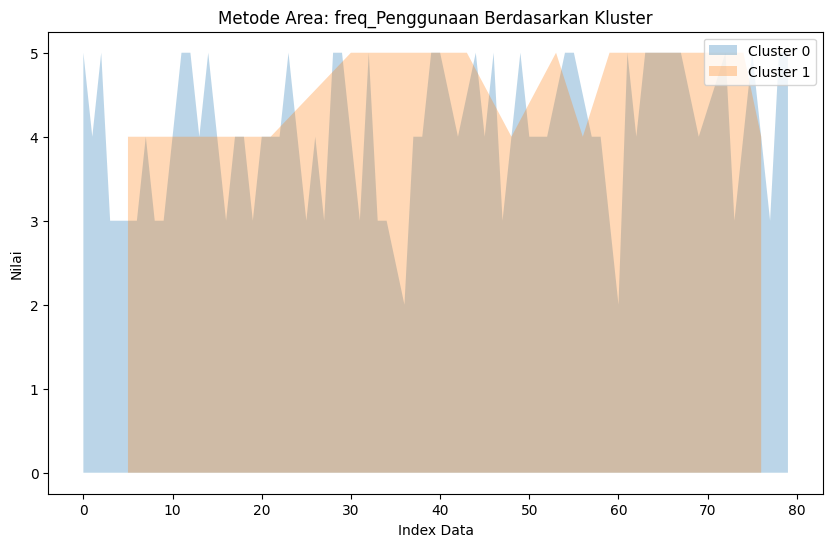

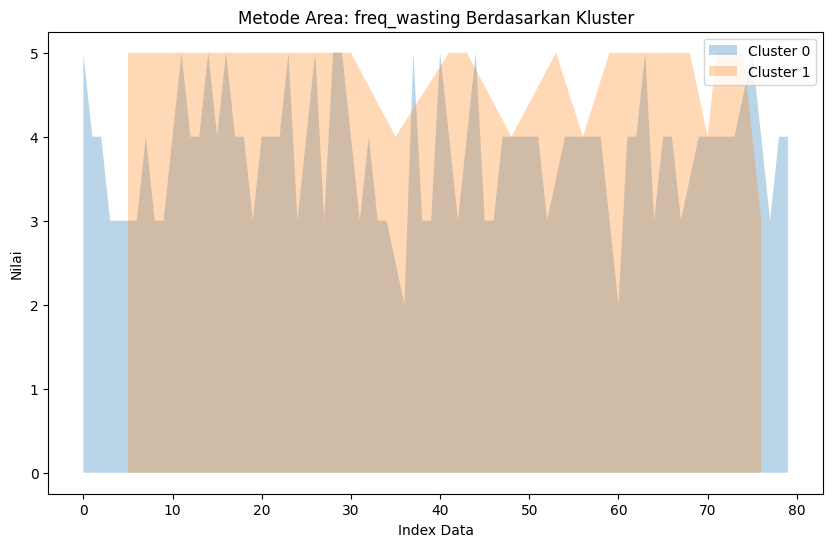

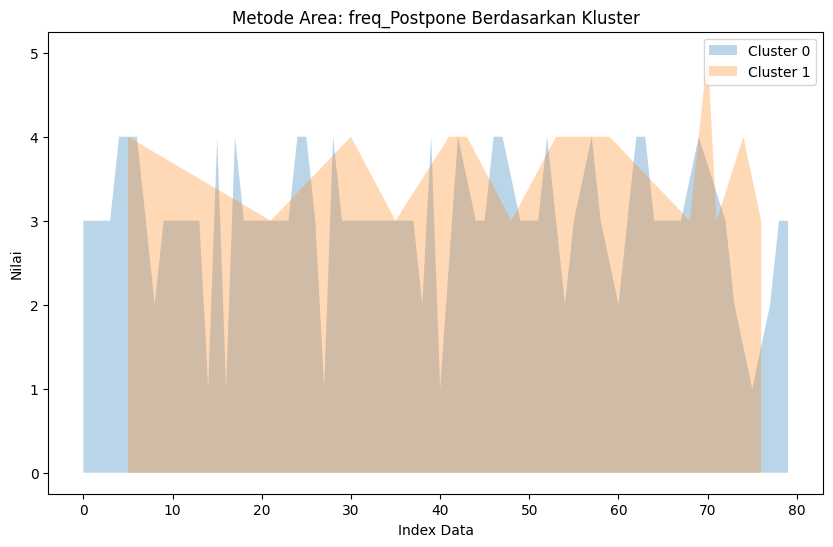

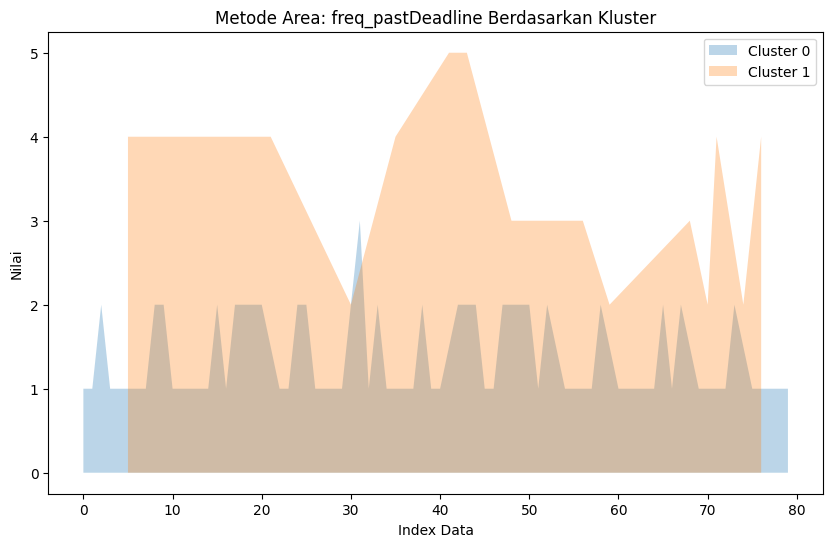

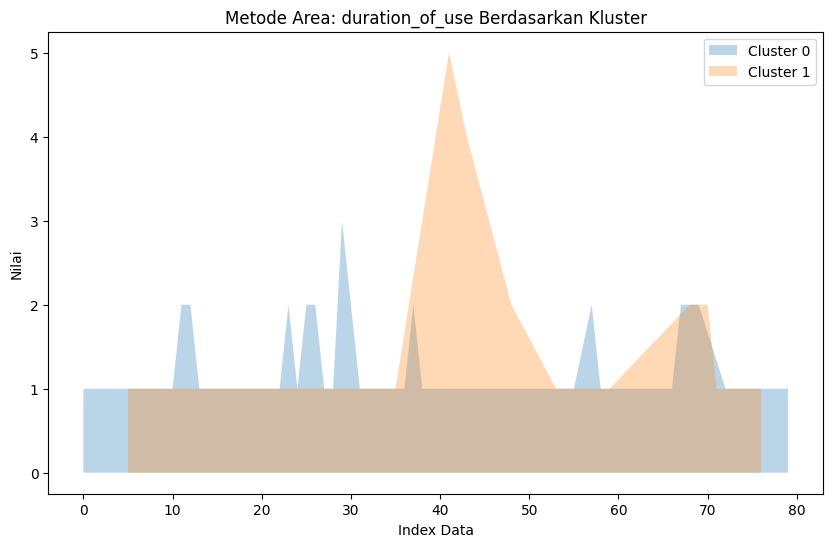

In [10]:
# Pilih kolom-kolom yang ingin Anda jadikan input (variabel independen)
input_columns = data[['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']]

# Langkah klustering dengan K-Means
n_clusters = 2  # Ganti dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(input_columns)

# Gantilah nilai output dengan label klaster
output_column = data['cluster']

# Membuat plot area untuk setiap kolom berdasarkan kluster
for column in input_columns.columns:
    plt.figure(figsize=(10, 6))
    
    for cluster_label in range(n_clusters):
        cluster_data = data[data['cluster'] == cluster_label]
        plt.fill_between(cluster_data.index, cluster_data[column], label=f'Cluster {cluster_label}', alpha=0.3)

    # Penyuntingan plot
    plt.title(f'Metode Area: {column} Berdasarkan Kluster')
    plt.xlabel('Index Data')
    plt.ylabel('Nilai')
    plt.legend()
    plt.show()


C:\Users\Johan RN\AppData\Local\Temp\ipykernel_20924\3386685525.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=data.index, y=column, label=column, estimator='mean', ci=None)
C:\Users\Johan RN\AppData\Local\Temp\ipykernel_20924\3386685525.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=data.index, y=column, label=column, estimator='mean', ci=None)
C:\Users\Johan RN\AppData\Local\Temp\ipykernel_20924\3386685525.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=data.index, y=column, label=column, estimator='mean', ci=None)
C:\Users\Johan RN\AppData\Local\Temp\ipykernel_20924\3386685525.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=data.index, y=column, label=column, estimator='

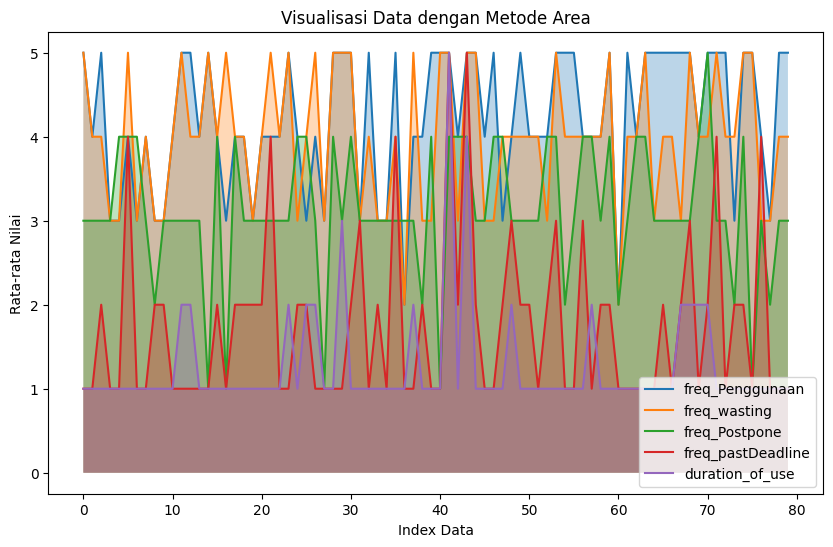

In [11]:
import seaborn as sns

# Pilih kolom-kolom yang ingin Anda visualisasikan
selected_columns = ['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']

# Membuat plot area untuk setiap kolom
plt.figure(figsize=(10, 6))
for column in selected_columns:
    sns.lineplot(data=data, x=data.index, y=column, label=column, estimator='mean', ci=None)
    plt.fill_between(data.index, data[column], alpha=0.3)

# Penyuntingan plot
plt.title('Visualisasi Data dengan Metode Area')
plt.xlabel('Index Data')
plt.ylabel('Rata-rata Nilai')
plt.legend()
plt.show()


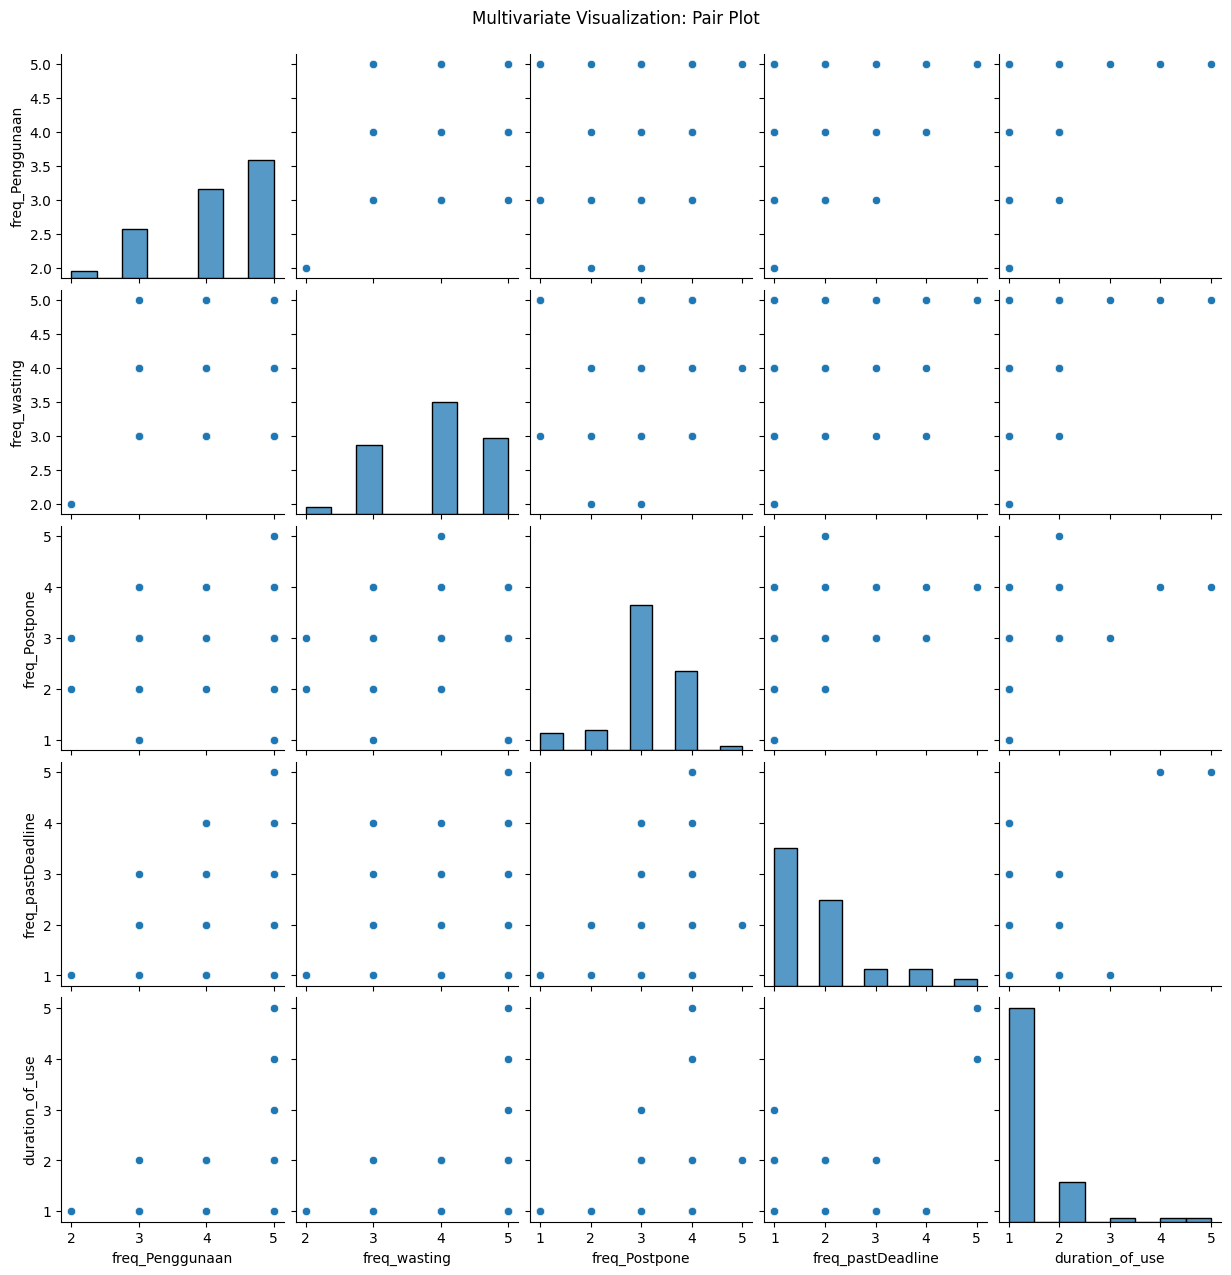

In [12]:
# Pilih kolom-kolom yang ingin Anda visualisasikan
selected_columns = ['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']

# Membuat pair plot
sns.pairplot(data[selected_columns], height=2.5)
plt.suptitle('Multivariate Visualization: Pair Plot', y=1.02)
plt.show()


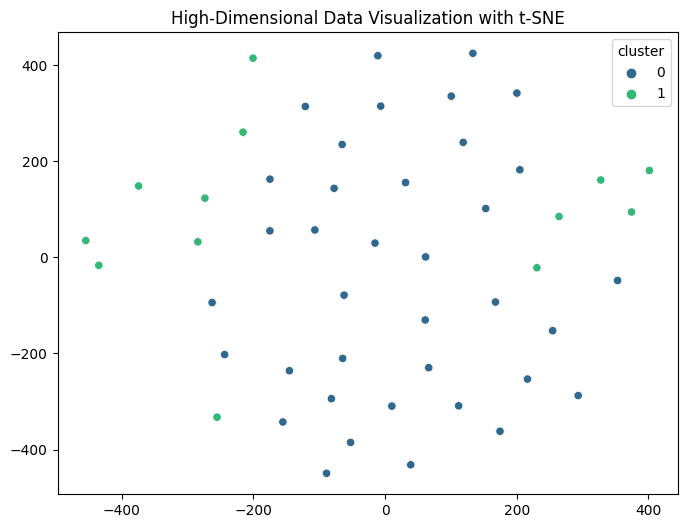

In [13]:
from sklearn.manifold import TSNE

# Pilih kolom-kolom yang ingin Anda visualisasikan
selected_columns = ['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']

# Reduksi dimensi dengan t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data[selected_columns])

# Membuat scatter plot 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=data['cluster'], palette='viridis')
plt.title('High-Dimensional Data Visualization with t-SNE')
plt.show()


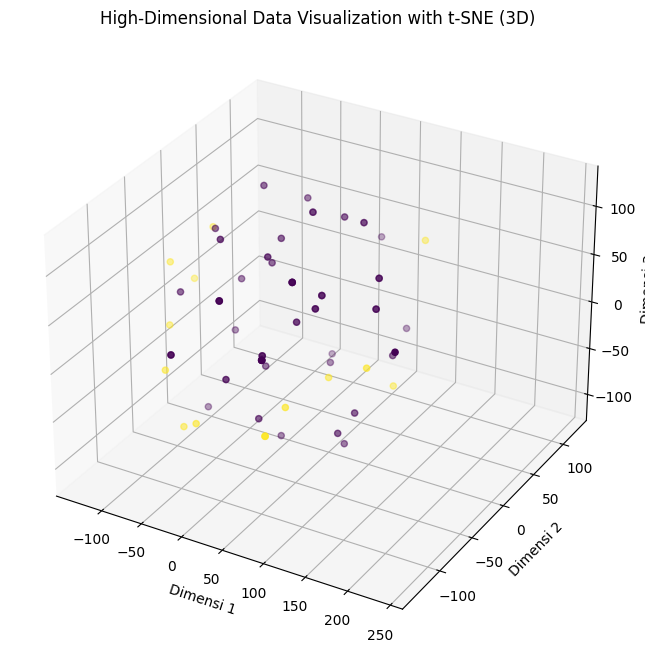

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Pilih kolom-kolom yang ingin Anda visualisasikan
selected_columns = ['freq_Penggunaan', 'freq_wasting', 'freq_Postpone', 'freq_pastDeadline', 'duration_of_use']

# Reduksi dimensi dengan t-SNE
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data[selected_columns])

# Membuat scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_tsne[:, 0], data_tsne[:, 1], data_tsne[:, 2], c=data['cluster'], cmap='viridis')

ax.set_xlabel('Dimensi 1')
ax.set_ylabel('Dimensi 2')
ax.set_zlabel('Dimensi 3')
ax.set_title('High-Dimensional Data Visualization with t-SNE (3D)')
plt.show()
